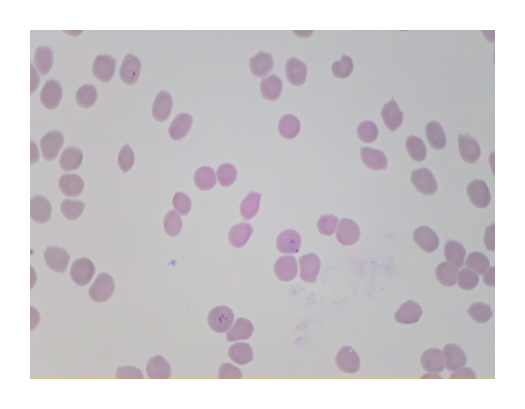

In [28]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io
import os, sys
import glob
import cv2
currentdir = os.path.dirname(os.path.realpath('run_cellpose.ipynb'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

org_files = ['../data/testing_openflexure/2021-03-05_15-50-16_0_0_5578.jpeg']

# view 1 image
img = io.imread(org_files[-1])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [29]:
imgs = [cv2.imread(img_path) for img_path in org_files]

In [30]:
img_height = 256
img_width = 256
img_channels = 3
imgs_red = np.zeros((len(imgs), img_height, img_width, img_channels), dtype=np.uint8)
sizes_imgs_red = []
for idx, img in enumerate(imgs):
    img_red = cv2.resize(img, (img_height, img_width))
    #Append image to numpy array
    imgs_red[idx] = img_red
    #Append image shape to numpy array
    sizes_imgs_red.append([img_red.shape[0], img_red.shape[1]])

In [33]:
imgs_red[0].shape

(256, 256, 3)

In [32]:
# RUN CELLPOSE

from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [[2,3], [0,0], [0,0]]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

# you can run all in a list e.g.
# >>> imgs = [io.imread(filename) in files]
# >>> masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)
# >>> io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
# >>> io.save_to_png(imgs, masks, flows, files)

# or in a loop
for chan, img in zip(channels, imgs_red):
    #img = io.imread(filename)
    masks, flows, styles, diams = model.eval(img, diameter=None, channels=chan)

    # save results so you can load in gui
    io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)

    # save results as png
    io.save_to_png(img, masks, flows, filename)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
computing styles from images
time spent: running network 2.10s; flow+mask computation 0.53
estimated cell diameters for 1 image(s) in 3.84 sec
>>> diameter(s) =  [14.25065642]
time spent: running network 8.17s; flow+mask computation 0.86
estimated masks for 1 image(s) in 9.03 sec
>>>> TOTAL TIME 12.87 sec


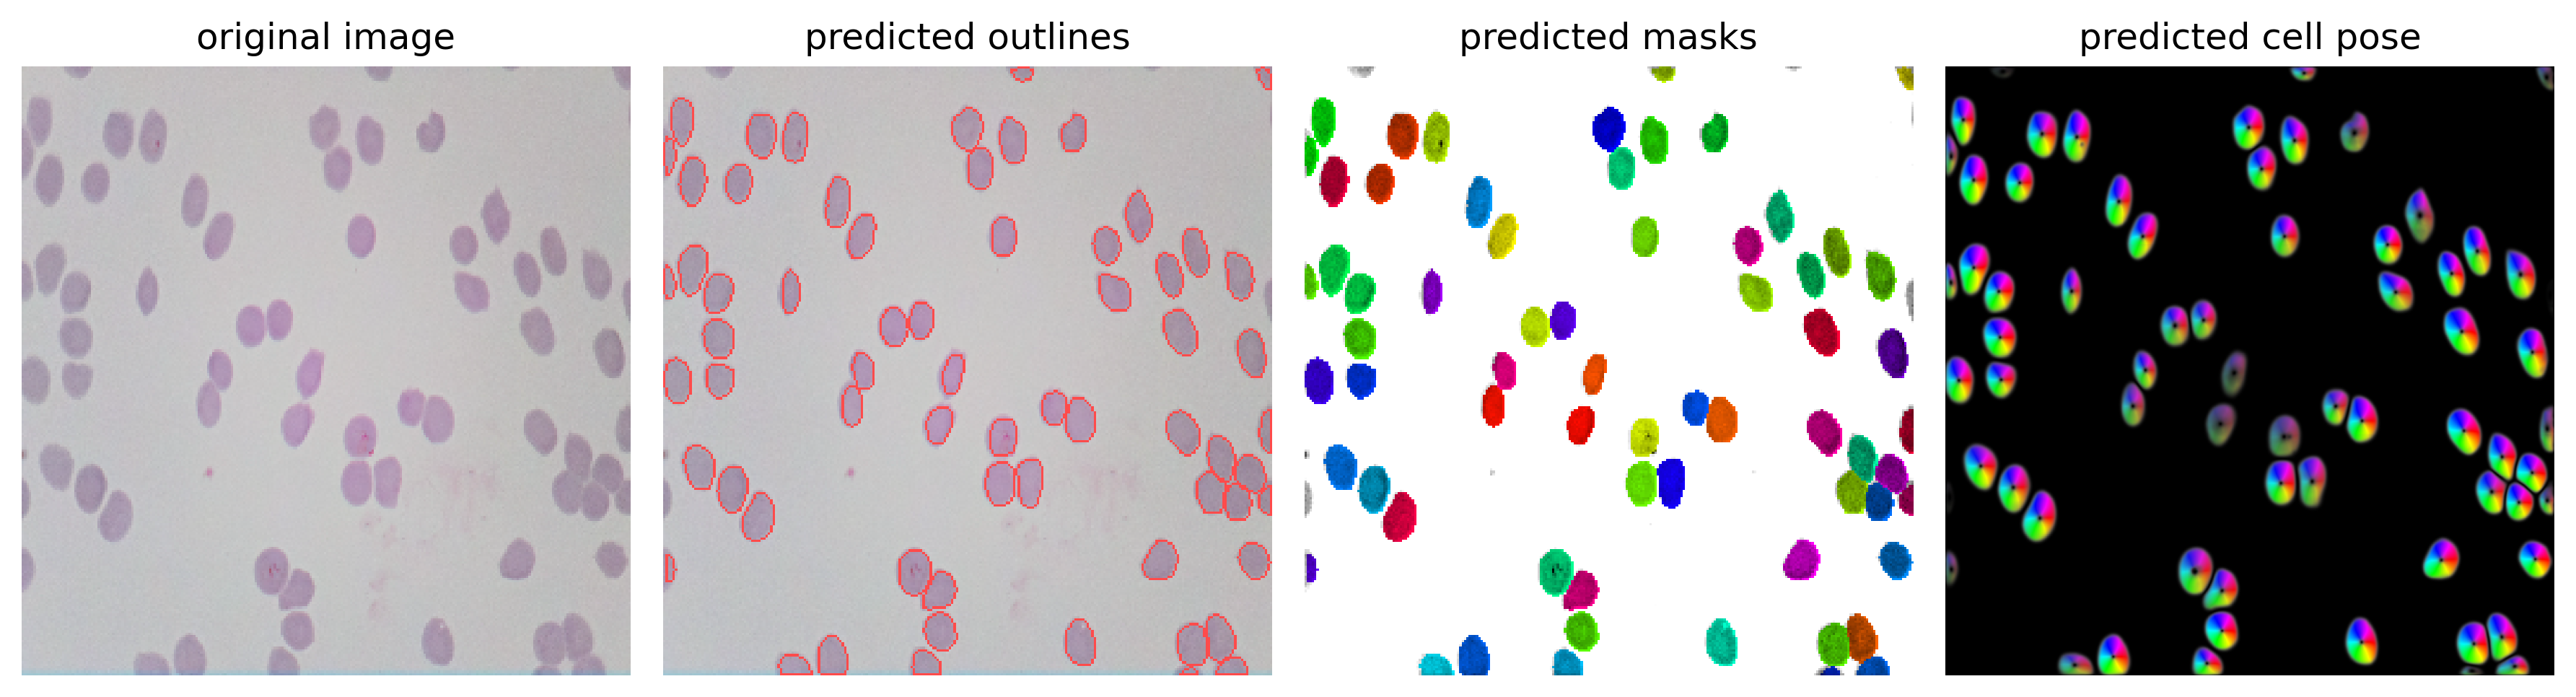

In [34]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()